## Packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
from statisticaltools import InterCumulSamp
from statisticaltools import Statisticaltools1
from statisticaltools import Statisticaltools2
from scipy import special 

pi = np.pi
exp = np.exp
Erf = special.erf

## Datas

In [2]:
#Constants:
sigma = 1.0
mi = 4
mi_gauss = 0.0

#Range and points:
n = 100 #number of points
bins = 10 #number of bins

#Spaces
x = np.linspace(-5, 5.0, num=n)
x_dist3 = np.linspace(1,10,num=n)
s_list =np.random.uniform(0.0, 1.0, n)



## Distribuitions

In [3]:
# Uniform distribuition

uniform = np.random.uniform(0,1,n) #points of uniform distribuition

#Normal distribuition

#Gaussian function:
def gauss (x):
    g =[]
        
    for j in range(0,len(x)): 
                
        g_i =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow ((x[j] - mi_gauss) / sigma, 2.0))
        
        g.append(g_i)
    return g

normal = gauss(x)

# Third distribuition

def dist3 (x):
    g =[]
    for j in range(0,len(x)): 
        g_j =  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] - mi) / sigma), 2.0))
        g_i=  (1 / ( sigma * pow((2*pi),0.5)))* exp( -0.5 * pow (((x[j] + mi) / sigma), 2.0))
        a = Erf(mi / pow(2*sigma, 0.5))
        
        d = (g_j - g_i) / a
                
        g.append(d)
        
    return g

dist_3 = dist3 (x_dist3)

### 1) a) N-point samples of the distributions:

In [4]:
# Uniform:
#samples given by uniform = np.random.uniform(0,1,n)

# Normal:
normal_dist = InterCumulSamp(normal, x)
normal_points = normal_dist.sampler_list_points(s_list)

#Distribuition 3:
terceira_dist = InterCumulSamp(dist_3, x_dist3)
ter_points = terceira_dist.sampler_list_points(s_list)

#print(ter_points)

### b) Bins

<Figure size 432x288 with 0 Axes>

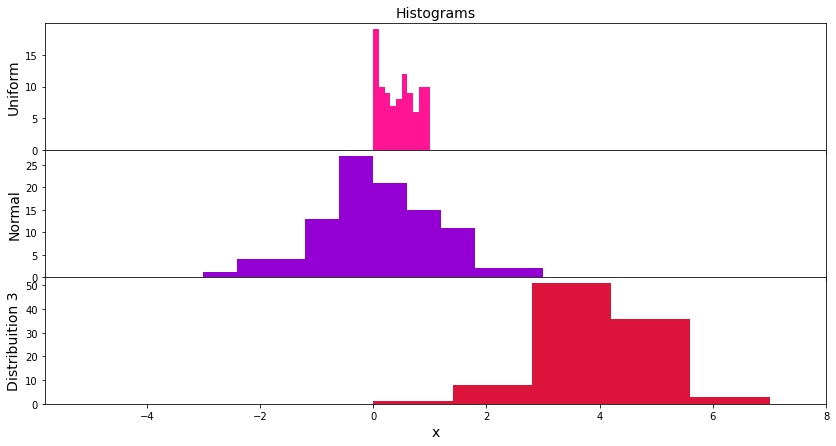

In [5]:
plt.figure()
fig, axs = plt.subplots (3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(14,7))

axs[0].hist(uniform, bins,[0.0, 1.0], color='deeppink') #histograma da uniforme
axs[1].hist(normal_points, bins, [-3.0, 3.0], color='darkviolet') #histograma da normal
axs[2].hist(ter_points, bins, [-7, 7], color='crimson') #histograma da terceira distribuição

axs[2].set_xlabel('x', fontsize=14)

axs[0].set_ylabel('Uniform', fontsize=14)
axs[1].set_ylabel('Normal', fontsize=14)
axs[2].set_ylabel('Distribuition 3', fontsize=14)

axs[0].set_title('Histograms', fontsize=14)
plt.xlim([-5.8, 8])

plt.show ()

In [6]:
#Number of points de pontos in each bin for distributions:

#Uniform
uniform_bins_number = np.histogram(uniform, bins)[0] # ni
uniform_bins_interval = np.histogram(uniform, bins)[1]

#Normal
normal_bins_number = np.histogram(normal_points, bins)[0]

#Distribuition 3
dist3_bins_number = np.histogram(ter_points, bins)[0]

print(uniform_bins_interval)
#print(uniform_bins_number, normal_bins_number, dist3_bins_number)

[0.00577429 0.10398835 0.20220241 0.30041647 0.39863052 0.49684458
 0.59505864 0.6932727  0.79148676 0.88970082 0.98791488]


In [7]:
#Cumulative

#Normal
normal_cumulativa = normal_dist.cumulative_all_points()

#Distribuition 3
dist3_cumulativa = terceira_dist.cumulative_all_points()


In [8]:
# Expected value of points in each subinterval

#n=100

n_normal = []
for a in range (0, bins-1):
    ni = normal_bins_number[a] * normal_cumulativa[a+1][0]
    n_normal.append(ni)#esperado/teórico


In [9]:
err = Statisticaltools2(n_normal, normal_bins_number)
n_erro_absoluto = err.absolute_error()

In [10]:
#n=1000

#Range and points:
n1000 = 1000 #number of points
bins1000 = 1000 #number of bins

#Spaces
x1000 = np.linspace(-5, 5.0, num=n1000)
x_dist31000 = np.linspace(1,7,num=n1000)
s_list1000 =np.random.uniform(0.0, 1.0, n1000)

normal1000 = gauss(x1000)
normal_dist1000 = InterCumulSamp(normal1000, x1000)
normal_points1000 = normal_dist1000.sampler_list_points(s_list1000)
normal_bins_number1000 = np.histogram(normal_points1000, bins1000)[0]
normal_cumulativa1000 = normal_dist1000.cumulative_all_points()

n_normal1000 = []
for a in range (0, 999):
    ni = normal_bins_number1000[a] * normal_cumulativa1000[a+1][0]
    n_normal1000.append(ni)

err1000 = Statisticaltools2(n_normal1000, normal_bins_number1000)
n_erro_absoluto1000 = err1000.absolute_error()

In [11]:
# #n=10000

# #Range and points:
# n10000 = 10000 #number of points
# bins10000 = 10000 #number of bins

# #Spaces
# x10000 = np.linspace(-5, 5.0, num=n10000)
# x_dist310000 = np.linspace(1,7,num=n10000)
# s_list10000 =np.random.uniform(0.0, 1.0, n10000)

# normal10000 = gauss(x10000)
# normal_dist10000 = InterCumulSamp(normal10000, x10000)
# normal_points10000 = normal_dist1000.sampler_list_points(s_list10000)
# normal_bins_number10000 = np.histogram(normal_points10000, bins10000)[0]
# normal_cumulativa10000 = normal_dist10000.cumulative_all_points()

# n_normal10000 = []
# for a in range (0, 9999):
#     ni = normal_bins_number10000[a] * normal_cumulativa10000[a+1][0]
#     n_normal10000.append(ni)

# err10000 = Statisticaltools2(n_normal10000, normal_bins_number10000)
# n_erro_absoluto10000 = err10000.absolute_error()

## c) Relative diference $\left( \frac{ni}{ \overline{ni}} - 1 \right)$ 

In [12]:
dif_relative = []
for i in range(0, len(n_normal)):
    dif = ((uniform_bins_number[i] / n_normal[i]) -1)
    dif_relative.append(dif)

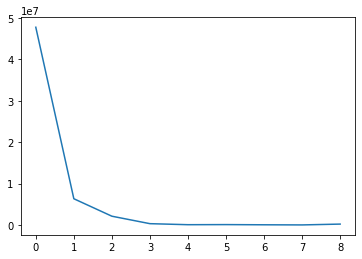

In [13]:
plt.plot(dif_relative)

## 2) Average and Variance for Gaussian Distribution

In [14]:
#Average and Variance
t = 1000
variancias =[]
medias =[]
for j in range(0, t):
    s_list =np.random.uniform(0.0, 1.0, 100)
    normal_points = normal_dist.sampler_list_points(s_list)
    n = Statisticaltools1(normal_points)
    normal_media = n.media_aritmetica()
    normal_var = n.variance()
    medias.append(normal_media)
    variancias.append(normal_var)

soma_var = []       
soma_medias = []
mi = 0
vi = 0
for n in range(0, len(medias)-1):
    mi = mi + medias[n] 
    vi = vi + variancias[n]
    soma_medias.append(mi/(n+1))
    soma_var.append(vi/(n+1))
    


<Figure size 432x288 with 0 Axes>

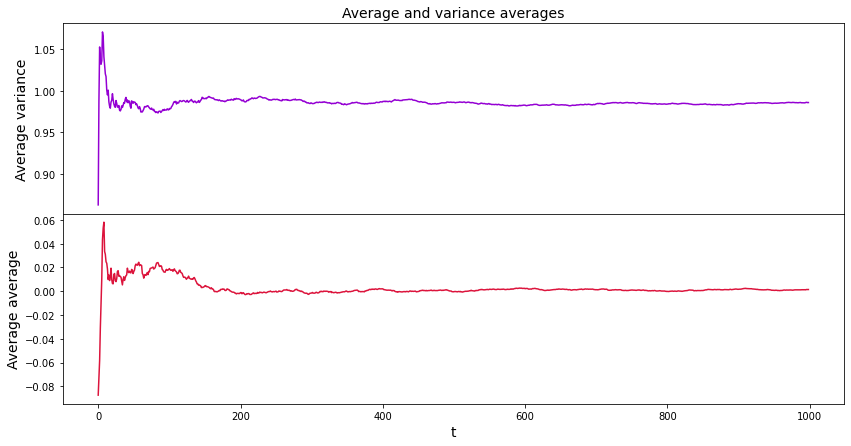

In [15]:
plt.figure()
fig, axs = plt.subplots (2, sharex=True, gridspec_kw={'hspace': 0}, figsize=(14,7))

axs[0].plot(soma_var, color='darkviolet')
axs[1].plot(soma_medias, color='crimson') 

axs[1].set_xlabel("t", fontsize=14)

axs[0].set_ylabel('Average variance', fontsize=14)
axs[1].set_ylabel('Average average', fontsize=14)


axs[0].set_title('Average and variance averages', fontsize=14)


plt.show ()

## 3) Skew e Curtosis

In [16]:
nw =[10, 100, 1000,10000, 100000]

skew_list = []
curtosis_list =[]
for i in nw:
    x_dist3w = np.linspace(0,10,500)
    dist_3w = dist3 (x_dist3w)
    

    terceira_distw = InterCumulSamp(dist_3w, x_dist3w)    
    s_listw =np.random.uniform(0.0, 0.998, i)
    ter_pointsw = terceira_dist.sampler_list_points(s_listw)
    if None in ter_pointsw:
        index = ter_pointsw.index(None)
        print(s_listw[index])
    obj_dist3 = Statisticaltools1(ter_pointsw)

    #Skew da distribuição 3
    skew_list.append(obj_dist3.skew())

    #Curtosis da distribuição 3
    curtosis_list.append(obj_dist3.curtosis())
    

print(skew_list, curtosis_list)

#Estabiliza para n = 10000

/home/cinthia/Documentos/Disciplina Análise de Dados/Repositório/statisticaltools.py:53: RuntimeWarning: divide by zero encountered in double_scalars
  coefs_a = dx / dc
/home/cinthia/Documentos/Disciplina Análise de Dados/Repositório/statisticaltools.py:54: RuntimeWarning: divide by zero encountered in double_scalars
  coefs_b = -dx / dc * cumulative_all[j][0] + cumulative_all[j][1]


[0.36919050651777047, 0.2615917600217546, -0.05171928021094058, 0.039190221675388826, 0.02411021937105766] [5.803205382716589, -2.2693704223100593, 0.10691689702518925, 0.07736215210077946, 0.13265963887178778]


## 4)  a)Correlation and covariance of uniform and normal distributions

In [17]:
#Numero de pontos
p =10000

#Distribuições
uniform_x1 = np.random.uniform(0,1,p) #Uniform

xn = np.linspace(-5, 5.0, 500)
norm = gauss(xn)
normal_d = InterCumulSamp(norm, xn)
s_listxy =np.random.uniform(0.0, 1.0, p)
normal_y = normal_dist.sampler_list_points(s_listxy) #Normal


obj_xy = Statisticaltools2(uniform_x1, normal_y)
obj_x = Statisticaltools1(uniform_x1)
obj_y = Statisticaltools1(normal_y)

#Covariancia
cov_xy = obj_xy.covariance()


#Correlação
a = obj_x.variance() ** (0.5)
b = obj_y.variance() ** (0.5)

cor_xy = (cov_xy) / (a * b)

print(cov_xy, cor_xy)

-0.004803203195284173 -0.016541727272455734


## b) i) {xi, yi +xi}

In [18]:
#Number of points
p =10000

#Distribuitions
uniform_x2 = np.random.uniform(0,1,p) #Uniform

xn = np.linspace(-5, 5.0, 500)
norm = gauss(xn)
normal_d = InterCumulSamp(norm, xn)
s_listxy =np.random.uniform(0.0, 1.0, p)
normal_y = normal_dist.sampler_list_points(s_listxy) #Normal

som_xy =[]
for i in range(0, len(normal_y)):
    s = normal_y[i] + uniform_x2[i]
    som_xy.append(s)


obj_som_xy2 = Statisticaltools2(uniform_x2, som_xy)
obj_som_xy = Statisticaltools1(som_xy)

#Covariance
cov_som_xy = obj_som_xy2.covariance()


#Correlation
a = obj_x.variance() ** (0.5)
b_som_xy = obj_som_xy.variance() ** (0.5)

cor_som_xy = (cov_som_xy) / (a * b_som_xy)

print(cov_som_xy, cor_som_xy)

0.08921084227214021 0.29726176893422196


## ii) {xi, yi-xi}

In [19]:
#Number of points
p =10000

#Distribuitions
uniform_x3 = np.random.uniform(0,1,p) #Uniform

xn = np.linspace(-5, 5.0, 500)
norm = gauss(xn)
normal_d = InterCumulSamp(norm, xn)
s_listxy =np.random.uniform(0.0, 1.0, p)
normal_y = normal_dist.sampler_list_points(s_listxy) #Normal

sub_xy =[]
for i in range(0, len(normal_y)):
    s = normal_y[i] - uniform_x3[i]
    sub_xy.append(s)


obj_sub_xy2 = Statisticaltools2(uniform_x3, sub_xy)
obj_sub_xy = Statisticaltools1(sub_xy)

#Covariance
cov_sub_xy = obj_sub_xy2.covariance()


#Correlation
a = obj_x.variance() ** (0.5)
b_sub_xy = obj_sub_xy.variance() ** (0.5)

cor_sub_xy = (cov_sub_xy) / (a * b_sub_xy)

print(cov_sub_xy, cor_sub_xy)

-0.08308580580496856 -0.2754973651827354


## c) Scatter plot

Text(0, 0.5, '{xi, yi - xi}')

<Figure size 432x288 with 0 Axes>

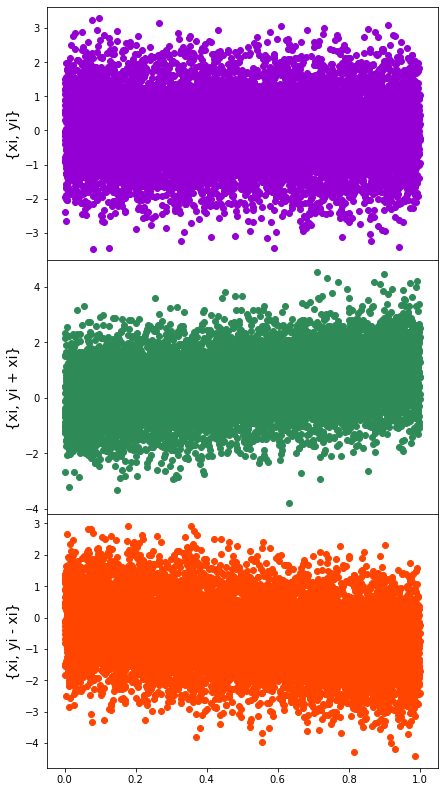

In [20]:
plt.figure()
fig, axs = plt.subplots (3, sharex=True, gridspec_kw={'hspace': 0}, figsize=(7,14))


axs[0].scatter(uniform_x1, normal_y, color='darkviolet')
axs[1].scatter(uniform_x2, som_xy, color='seagreen')
axs[2].scatter(uniform_x3, sub_xy, color='orangered')

axs[0].set_ylabel('{xi, yi}', fontsize=14)
axs[1].set_ylabel('{xi, yi + xi}', fontsize=14)
axs[2].set_ylabel('{xi, yi - xi}', fontsize=14)


